Basic map for pipeline figure

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import pandas as pd
import matplotlib.patches as patches
import matplotlib.colors as colors
import matplotlib.patheffects as PathEffects
import numpy as np
import os

In [ ]:
coordinates_data_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge'
coordinates_data_file = 'coordinates.xlsx'
df = pd.read_excel(f"{coordinates_data_path}/{coordinates_data_file}")
longs = df['Longitude'].values
lats = df['Latitude'].values
colors = ['xkcd:' + df['Color'].values[i] for i in range(0, len(longs))]

In [ ]:
plot_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/map'
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.scatter(x=longs, 
            y=lats, 
            s=40, 
            c=colors,
            edgecolors='k',
            linewidth=0.5,
            transform=ccrs.PlateCarree())
plt.savefig(f'{plot_path}/map_countries.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_countries.pdf', bbox_inches='tight')

In [ ]:
df_non_europe = df.loc[df['Europe'] == False, :]
longs_non_europe = df_non_europe['Longitude'].values
lats_non_europe = df_non_europe['Latitude'].values
colors_non_europe = ['xkcd:' + df_non_europe['Color'].values[i] for i in range(0, len(longs_non_europe))]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.scatter(x=longs_non_europe, 
            y=lats_non_europe, 
            s=150, 
            c=colors_non_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())
ax.add_patch(patches.Rectangle(xy=(-15, 35), width=50, height=35, linewidth=2, facecolor='none', edgecolor='m', transform=ccrs.PlateCarree()))
plt.savefig(f'{plot_path}/map_non_europe.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_non_europe.pdf', bbox_inches='tight')

In [ ]:
df_europe = df.loc[df['Europe'] == True, :]
longs_europe = df_europe['Longitude'].values
lats_europe = df_europe['Latitude'].values
colors_europe = ['xkcd:' + df_europe['Color'].values[i] for i in range(0, len(longs_europe))]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.set_extent ((-15, 35, 35, 70), ccrs.PlateCarree())
plt.scatter(x=longs_europe, 
            y=lats_europe, 
            s=100,
            c=colors_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())

for spine in ax.spines.values():
    spine.set_edgecolor('m')
    spine.set_linewidth(2)

plt.savefig(f'{plot_path}/map_europe.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_europe.pdf', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.scatter(x=longs_non_europe, 
            y=lats_non_europe, 
            s=150, 
            c=colors_non_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())
ax.add_patch(patches.Rectangle(xy=(-15, 35), width=50, height=35, linewidth=2, facecolor='none', edgecolor='m', transform=ccrs.PlateCarree()))

subax = plt.axes([0, 0, 0.5, 0.5], projection=ccrs.PlateCarree())
subax.stock_img()
subax.coastlines()
subax.set_extent ((-15, 35, 35, 70), ccrs.PlateCarree())
plt.scatter(x=longs_europe, 
            y=lats_europe, 
            s=100,
            c=colors_europe,
            edgecolors='m',
            linewidth=0.5,
            transform=ccrs.PlateCarree())

ax.get_figure().canvas.draw()
p1 = ax.get_position()
p2 = subax.get_position()
subax.set_position([p1.x0+0.9*p2.width, p1.y0, p2.width*0.67, p2.height*0.67])
for spine in subax.spines.values():
    spine.set_edgecolor('m')
    spine.set_linewidth(2)
    
plt.savefig(f'{plot_path}/map.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map.pdf', bbox_inches='tight')

Maps with Aggregated EAA Sign

In [ ]:
data_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/epi_est_stat/by_tissue/Blood/states'
eaa_data_file = 'aerr_mean.xlsx'
pace_data_file = 'pace_mean.xlsx'
eaa_df = pd.read_excel(f"{data_path}/{eaa_data_file}")
pace_df = pd.read_excel(f"{data_path}/{pace_data_file}")
aggregated_eaa_sign = [0] * eaa_df['State'].size
for index, row in eaa_df.iterrows():
    for clock_id in range(1, len(row)):
        if row.iloc[clock_id] > 0:
            aggregated_eaa_sign[index] += 1
        else:
            aggregated_eaa_sign[index] -= 1
eaa_df['Sign EAA'] = aggregated_eaa_sign
aggregated_pace_sign = [0] * pace_df['State'].size
for index, row in pace_df.iterrows():
    for clock_id in range(1, len(row)):
        if row.iloc[clock_id] > 1:
            aggregated_pace_sign[index] += 1
        else:
            aggregated_pace_sign[index] -= 1
pace_df['Sign PACE'] = aggregated_pace_sign
df = pd.merge(eaa_df, pace_df, on='State')
aggregated_sign = [0] * df['State'].size
for index, row in df.iterrows():
    aggregated_sign[index] = row['Sign EAA'] + row['Sign PACE']
df['Sign'] = aggregated_sign

In [ ]:
plot_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/map'

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='0.9'))
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
states_signs = pd.Series(df.Sign.values, index=df.State).to_dict()
if 'UK' in states_signs:
    states_signs['United Kingdom'] = states_signs.pop('UK')
if 'USA' in states_signs:
    states_signs['United States of America'] = states_signs.pop('USA')
if 'Congo' in states_signs:
    states_signs['Dem. Rep. Congo'] = states_signs.pop('Congo')
geometries = {}
for country in countries:
    if country.attributes['NAME'] in states_signs:
        geometries[country.attributes['NAME']] = country.geometry
min_val = -abs(max(df.Sign.values, key=abs))
max_val = abs(max(df.Sign.values, key=abs))
norm = colors.Normalize(vmin=min_val, vmax=max_val)
cmap = plt.cm.bwr
for country in states_signs:
    ax.add_geometries(geometries[country], ccrs.PlateCarree(), facecolor=cmap(norm(states_signs[country])))
ax.add_feature(cfeature.BORDERS, edgecolor='0.7', linewidth=0.2)
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)

plt.savefig(f'{plot_path}/map_sign_test.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_sign_test.pdf', bbox_inches='tight')

Map with Europe/non-Europe

In [ ]:
data_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge'
coordinates_data_file = 'coordinates.xlsx'
df_coord = pd.read_excel(f"{data_path}/{coordinates_data_file}", index_col=0)
df_europe = df_coord.loc[df_coord['Europe'] == True, :]
df_non_europe = df_coord.loc[df_coord['Europe'] == False, :]
dict_europe = df_europe.to_dict('index')
dict_non_europe = df_non_europe.to_dict('index')

tissues_data_file = 'count_tissues.xlsx'
tissues_df = pd.read_excel(f"{data_path}/{tissues_data_file}", index_col=0)
tissues = list(tissues_df.index)

for tissue in tissues:

    data_path = f'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/epi_est_stat/by_tissue/{tissue}/states'
    if os.path.exists(data_path):
        eaa_data_file = 'aerr_mean.xlsx'
        pace_data_file = 'pace_mean.xlsx'
        eaa_df = pd.read_excel(f"{data_path}/{eaa_data_file}")
        pace_df = pd.read_excel(f"{data_path}/{pace_data_file}")
        aggregated_eaa_sign = [0] * eaa_df['State'].size
        for index, row in eaa_df.iterrows():
            for clock_id in range(1, len(row)):
                if row.iloc[clock_id] > 0:
                    aggregated_eaa_sign[index] += 1
                else:
                    aggregated_eaa_sign[index] -= 1
        eaa_df['Sign EAA'] = aggregated_eaa_sign
        aggregated_pace_sign = [0] * pace_df['State'].size
        for index, row in pace_df.iterrows():
            for clock_id in range(1, len(row)):
                if row.iloc[clock_id] > 1:
                    aggregated_pace_sign[index] += 1
                else:
                    aggregated_pace_sign[index] -= 1
        pace_df['Sign PACE'] = aggregated_pace_sign
        df = pd.merge(eaa_df, pace_df, on='State')
        aggregated_sign = [0] * df['State'].size
        for index, row in df.iterrows():
            aggregated_sign[index] = row['Sign EAA'] + row['Sign PACE']
        df['Sign'] = aggregated_sign
        
        plot_path = f'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/epi_est_stat/by_tissue/{tissue}'
        
        fig = plt.figure(figsize=(10, 5))
        ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
        ax.set_global()
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='0.8'))
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='0.95'))
        
        shpfilename = shpreader.natural_earth(resolution='10m',
                                              category='cultural',
                                              name='admin_0_countries')
        reader = shpreader.Reader(shpfilename)
        countries = reader.records()
        
        df_sign_non_europe = df.loc[df['State'].isin(dict_non_europe)]
        df_sign_europe = df.loc[df['State'].isin(dict_europe)]
        states_signs_non_europe = pd.Series(df_sign_non_europe.Sign.values, index=df_sign_non_europe.State).to_dict()
        states_signs_europe = pd.Series(df_sign_europe.Sign.values, index=df_sign_europe.State).to_dict()
        if 'USA' in states_signs_non_europe:
            states_signs_non_europe['United States of America'] = states_signs_non_europe.pop('USA')
            dict_non_europe['United States of America'] = dict_non_europe['USA']
        if 'Congo' in states_signs_non_europe:
            states_signs_non_europe['Dem. Rep. Congo'] = states_signs_non_europe.pop('Congo')
            dict_non_europe['Dem. Rep. Congo'] = dict_non_europe['Congo']
        if 'UK' in states_signs_europe:
            states_signs_europe['United Kingdom'] = states_signs_europe.pop('UK')
            dict_europe['United Kingdom'] = dict_europe['UK']
        geometries_non_europe = {}
        geometries_europe = {}
        for country in countries:
            if country.attributes['NAME'] in states_signs_non_europe:
                geometries_non_europe[country.attributes['NAME']] = country.geometry
            if country.attributes['NAME'] in states_signs_europe:
                geometries_europe[country.attributes['NAME']] = country.geometry
        
        min_val = -abs(max(df.Sign.values, key=abs))
        max_val = abs(max(df.Sign.values, key=abs))
        norm = colors.Normalize(vmin=min_val, vmax=max_val)
        cmap = plt.cm.bwr
        
        for country in states_signs_non_europe:
            ax.add_geometries(geometries_non_europe[country], ccrs.PlateCarree(),
                              facecolor=cmap(norm(states_signs_non_europe[country])))
            ax.text(dict_non_europe[country]['Longitude'], dict_non_europe[country]['Latitude'],
                    str(states_signs_non_europe[country]), transform=ccrs.PlateCarree(),
                    fontsize=8, weight='bold', color='white',
                    path_effects=[PathEffects.withStroke(linewidth=2, foreground="k")])
        
        if 'Singapore' in states_signs_non_europe:
            ax.text(95.0, -2.0, 'Singapore', transform=ccrs.PlateCarree(), fontsize=5, color='black')
        
        ax.add_feature(cfeature.BORDERS, edgecolor='0.5', linewidth=0.3)
        ax.add_feature(cfeature.COASTLINE, edgecolor='0.5', linewidth=0.3)
        
        subax = plt.axes([0, 0, 0.5, 0.5], projection=ccrs.PlateCarree())
        subax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='0.8'))
        subax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='0.95'))
        subax.set_extent((-12, 30, 35, 72), ccrs.PlateCarree())
        
        for country in states_signs_europe:
            subax.add_geometries(geometries_europe[country], ccrs.PlateCarree(),
                                 facecolor=cmap(norm(states_signs_europe[country])))
            subax.text(dict_europe[country]['Longitude'], dict_europe[country]['Latitude'],
                       str(states_signs_europe[country]), transform=ccrs.PlateCarree(),
                       fontsize=8, weight='bold', color='white',
                       path_effects=[PathEffects.withStroke(linewidth=2, foreground="k")])
        
        subax.add_feature(cfeature.BORDERS, edgecolor='0.5', linewidth=0.3)
        subax.add_feature(cfeature.COASTLINE, edgecolor='0.5', linewidth=0.3)
        
        ax.get_figure().canvas.draw()
        p1 = ax.get_position()
        p2 = subax.get_position()
        subax.set_position([p1.x0 + p2.width * 0.9, p1.y0 + p2.height * 0.8, p2.width * 0.71, p2.height * 0.71])
        for spine in subax.spines.values():
            spine.set_edgecolor('m')
            spine.set_linewidth(2)
        
        cax = fig.add_axes([0.9, 0.15, 0.02, 0.65])
        cb = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)
        cb.set_label(label='Aggregated Sign of EAA', size=15)
        
        plt.savefig(f'{plot_path}/map_aggregated_eaa_sign.png', bbox_inches='tight')
        plt.savefig(f'{plot_path}/map_aggregated_eaa_sign.pdf', bbox_inches='tight')

UK Map

In [ ]:
coordinates_gse_data_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge'
coordinates_gse_data_file = 'coordinates_gses.xlsx'
df = pd.read_excel(f"{coordinates_gse_data_path}/{coordinates_gse_data_file}")
df_uk =  df.loc[df['State'] == 'UK', :]
longs_uk = df_uk['Longitude'].values
lats_uk = df_uk['Latitude'].values
colors_uk = ['xkcd:' + df_uk['Color'].values[i] for i in range(0, len(longs_uk))]
gses_uk = df_uk['GSE'].values
locations_uk = df_uk['Location'].values

coordinates_states_data_file = 'coordinates.xlsx'
df_states = pd.read_excel(f"{coordinates_gse_data_path}/{coordinates_states_data_file}")
uk_color = df_states.loc[df_states['State'] == 'UK', :]['Color'].values[0]
uk_color_xkcd = f'xkcd:{uk_color}'

lats_uk_upd = [lats_uk[0]]
num_same = 1
sign = -1.0
for coord_id in range(1, len(longs_uk)):
    if lats_uk[coord_id] == lats_uk[coord_id - 1]:
        lats_uk_upd.append(lats_uk_upd[coord_id - 1] + num_same * sign * 0.38)
        num_same += 1
        sign *= -1.0
    else:
        lats_uk_upd.append(lats_uk[coord_id])
        num_same = 1

plot_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/map'

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='0.8'), zorder=1)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='0.95'), zorder=1)
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_map_units')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
uk_map_units = ['N. Ireland', 'Wales', 'Scotland', 'England']
geometries = {}
for country in countries:
    if country.attributes['NAME'] in uk_map_units:
        geometries[country.attributes['NAME']] = country.geometry

ax.set_extent ((-11, 6, 49, 60), ccrs.PlateCarree())
for country in geometries:
    ax.add_geometries(geometries[country], ccrs.PlateCarree(), edgecolor='0.2', linewidth=0.6, facecolor=uk_color_xkcd, alpha=0.3)
ax.add_feature(cfeature.BORDERS, edgecolor='0.5', linewidth=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='0.5', linewidth=0.3)

plt.scatter(x=longs_uk, 
            y=lats_uk_upd, 
            s=50,
            c=colors_uk,
            edgecolors='k',
            linewidth=0.4,
            transform=ccrs.PlateCarree(),
            zorder=2)

for gse_id in range(0, len(gses_uk)):
    if gses_uk[gse_id] == 'GSE113725':
        ax.text(longs_uk[gse_id] + 0.1, lats_uk_upd[gse_id] - 0.4,
                f'{gses_uk[gse_id]}, {locations_uk[gse_id]}', transform=ccrs.PlateCarree(),
                fontsize=10, color='black', path_effects=[PathEffects.withStroke(linewidth=2, foreground="white")])
    elif gses_uk[gse_id] == 'GSE84727':
        ax.text(longs_uk[gse_id] - 0.8, lats_uk_upd[gse_id] + 0.35,
                f'{gses_uk[gse_id]}, {locations_uk[gse_id]}', transform=ccrs.PlateCarree(),
                fontsize=10, color='black', path_effects=[PathEffects.withStroke(linewidth=2, foreground="white")])
    else:
        ax.text(longs_uk[gse_id] + 0.4, lats_uk_upd[gse_id] - 0.1,
                f'{gses_uk[gse_id]}, {locations_uk[gse_id]}', transform=ccrs.PlateCarree(),
                fontsize=10, color='black', path_effects=[PathEffects.withStroke(linewidth=2, foreground="white")])

plt.savefig(f'{plot_path}/map_uk.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_uk.pdf', bbox_inches='tight')

USA Map

In [ ]:
coordinates_gse_data_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge'
coordinates_gse_data_file = 'coordinates_gses.xlsx'
df = pd.read_excel(f"{coordinates_gse_data_path}/{coordinates_gse_data_file}")
df_usa =  df.loc[df['State'] == 'USA', :]
longs_usa = df_usa['Longitude'].values
lats_usa = df_usa['Latitude'].values
colors_usa = ['xkcd:' + df_usa['Color'].values[i] for i in range(0, len(longs_usa))]
gses_usa = df_usa['GSE'].values
locations_usa = df_usa['Location'].values

coordinates_states_data_file = 'coordinates.xlsx'
df_states = pd.read_excel(f"{coordinates_gse_data_path}/{coordinates_states_data_file}")
usa_color = df_states.loc[df_states['State'] == 'USA', :]['Color'].values[0]
usa_color_xkcd = f'xkcd:{usa_color}'

lats_usa_upd = [lats_usa[0]]
num_same = 1
sign = 1.0
for coord_id in range(1, len(longs_usa)):
    if lats_usa[coord_id] == lats_usa[coord_id - 1]:
        lats_usa_upd.append(lats_usa_upd[coord_id - 1] + num_same * sign * 0.9)
        num_same += 1
        sign *= -1.0
    else:
        lats_usa_upd.append(lats_usa[coord_id])
        num_same = 1

plot_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/map'

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='0.8'), zorder=1)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='0.95'), zorder=1)
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    if country.attributes['NAME'] == 'United States of America':
        geometry = country.geometry

ax.set_extent ((-123, -61, 22, 52), ccrs.PlateCarree())
ax.add_geometries(geometry, ccrs.PlateCarree(), edgecolor='0.2', linewidth=0.6, facecolor=usa_color_xkcd, alpha=0.2)
ax.add_feature(cfeature.BORDERS, edgecolor='0.5', linewidth=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='0.5', linewidth=0.3)
ax.add_feature(cfeature.STATES, edgecolor='0.5', linewidth=0.3)

plt.scatter(x=longs_usa, 
            y=lats_usa_upd, 
            s=50,
            c=colors_usa,
            edgecolors='k',
            linewidth=0.4,
            transform=ccrs.PlateCarree(),
            zorder=2)

for gse_id in range(0, len(gses_usa)):
    if gses_usa[gse_id] == 'GSE210255' or gses_usa[gse_id] == 'GSE157131' or gses_usa[gse_id] == 'GSE210254':
        ax.text(longs_usa[gse_id] - 13, lats_usa_upd[gse_id] - 0.3,
                f'{gses_usa[gse_id]}, {locations_usa[gse_id]}', transform=ccrs.PlateCarree(),
                fontsize=7.5, color='black', path_effects=[PathEffects.withStroke(linewidth=2, foreground="white")])
    elif gses_usa[gse_id] == 'GSE67530':
        ax.text(longs_usa[gse_id] - 12.3, lats_usa_upd[gse_id] - 0.3,
                f'{gses_usa[gse_id]}, {locations_usa[gse_id]}', transform=ccrs.PlateCarree(),
                fontsize=7.5, color='black', path_effects=[PathEffects.withStroke(linewidth=2, foreground="white")])
    elif gses_usa[gse_id] == 'GSE59250':
        ax.text(longs_usa[gse_id], lats_usa_upd[gse_id] - 1.2,
                f'{gses_usa[gse_id]}, {locations_usa[gse_id]}', transform=ccrs.PlateCarree(),
                fontsize=7.5, color='black', path_effects=[PathEffects.withStroke(linewidth=2, foreground="white")])
    elif gses_usa[gse_id] == 'GSE132181' and locations_usa[gse_id] in ['NY', 'MO, St. Louis']:
        ax.text(longs_usa[gse_id] + 1, lats_usa_upd[gse_id] - 0.6,
                f'{gses_usa[gse_id]}, {locations_usa[gse_id]}', transform=ccrs.PlateCarree(),
                fontsize=7.5, color='black', path_effects=[PathEffects.withStroke(linewidth=2, foreground="white")])
    elif gses_usa[gse_id] == 'GSE227809':
        ax.text(longs_usa[gse_id] - 7, lats_usa_upd[gse_id] + 0.7,
                f'{gses_usa[gse_id]}, {locations_usa[gse_id]}', transform=ccrs.PlateCarree(),
                fontsize=7.5, color='black', path_effects=[PathEffects.withStroke(linewidth=2, foreground="white")])
    elif gses_usa[gse_id] == 'GSE174818':
        ax.text(longs_usa[gse_id] - 11, lats_usa_upd[gse_id] + 0.7,
                f'{gses_usa[gse_id]}, {locations_usa[gse_id]}', transform=ccrs.PlateCarree(),
                fontsize=7.5, color='black', path_effects=[PathEffects.withStroke(linewidth=2, foreground="white")])
    else:
        ax.text(longs_usa[gse_id] + 0.85, lats_usa_upd[gse_id] - 0.3,
                f'{gses_usa[gse_id]}, {locations_usa[gse_id]}', transform=ccrs.PlateCarree(),
                fontsize=7.5, color='black', path_effects=[PathEffects.withStroke(linewidth=2, foreground="white")])

plt.savefig(f'{plot_path}/map_usa.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_usa.pdf', bbox_inches='tight')

Sweden Map

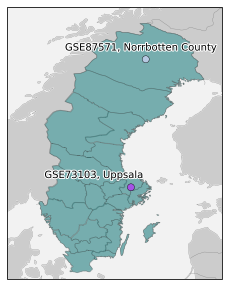

In [12]:
coordinates_gse_data_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge'
coordinates_gse_data_file = 'coordinates_gses.xlsx'
df = pd.read_excel(f"{coordinates_gse_data_path}/{coordinates_gse_data_file}")
df_sweden =  df.loc[df['State'] == 'Sweden', :]
longs_sweden = df_sweden['Longitude'].values
lats_sweden = df_sweden['Latitude'].values
colors_sweden = ['xkcd:' + df_sweden['Color'].values[i] for i in range(0, len(longs_sweden))]
gses_sweden = df_sweden['GSE'].values
locations_sweden = df_sweden['Location'].values

coordinates_states_data_file = 'coordinates.xlsx'
df_states = pd.read_excel(f"{coordinates_gse_data_path}/{coordinates_states_data_file}")
sweden_color = df_states.loc[df_states['State'] == 'Sweden', :]['Color'].values[0]
sweden_color_xkcd = f'xkcd:{sweden_color}'

plot_path = 'E:/YandexDisk/pydnameth/draft/10_MetaEPIClock/MetaEpiAge/figures/map'

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='0.8'), zorder=1)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='0.95'), zorder=1)
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    if country.attributes['NAME'] == 'Sweden':
        geometry = country.geometry

ax.set_extent ((10, 23, 55, 70), ccrs.PlateCarree())
ax.add_geometries(geometry, ccrs.PlateCarree(), edgecolor='0.2', linewidth=0.6, facecolor=sweden_color_xkcd, alpha=0.2)
ax.add_feature(cfeature.BORDERS, edgecolor='0.5', linewidth=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='0.5', linewidth=0.3)

shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_1_states_provinces')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
geometries = []
for country in countries:
    if country.attributes['admin'] == 'Sweden':
        geometries.append(country.geometry)
for country in geometries:
    ax.add_geometries(country, ccrs.PlateCarree(), edgecolor='0.2', linewidth=0.6, facecolor=sweden_color_xkcd, alpha=0.3)

plt.scatter(x=longs_sweden, 
            y=lats_sweden, 
            s=50,
            c=colors_sweden,
            edgecolors='k',
            linewidth=0.4,
            transform=ccrs.PlateCarree(),
            zorder=2)

for gse_id in range(0, len(gses_sweden)):
    ax.text(longs_sweden[gse_id] - 6, lats_sweden[gse_id] + 0.5,
            f'{gses_sweden[gse_id]}, {locations_sweden[gse_id]}', transform=ccrs.PlateCarree(),
            fontsize=10, color='black', path_effects=[PathEffects.withStroke(linewidth=2, foreground="white")])

plt.savefig(f'{plot_path}/map_sweden.png', bbox_inches='tight')
plt.savefig(f'{plot_path}/map_sweden.pdf', bbox_inches='tight')